
# **K-Means Clustering Algorithm**

K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. In this topic, we will learn what is K-means clustering algorithm, how the algorithm works, along with the Python implementation of k-means clustering.

**What is K-Means Algorithm?**

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

*It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.*

It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.



It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

The k-means clustering algorithm mainly performs two tasks




> Determines the best value for K center points or centroids by an iterative process.


> Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.






Hence each cluster has datapoints with some commonalities, and it is away from other clusters.



The below diagram explains the working of the K-means Clustering Algorithm:

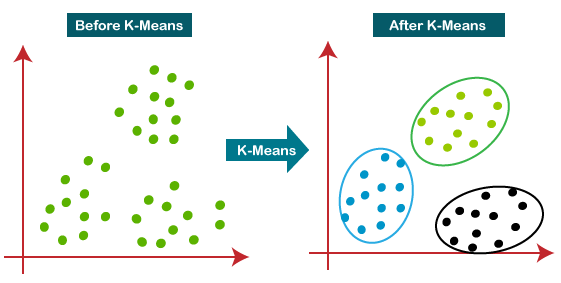

**How does the K-Means Algorithm Work?**

The working of the K-Means algorithm is explained in the below steps:

**Step-1:** Select the number K to decide the number of clusters.

**Step-2:** Select random K points or centroids. (It can be other from the input dataset).



**Step-3:** Assign each data point to their closest centroid, which will form the predefined K clusters.



**Step-4:** Calculate the variance and place a new centroid of each cluster.



**Step-5:** Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.



**Step-6:** If any reassignment occurs, then go to step-4 else go to FINISH.



**Step-7:** The model is ready.

Let's understand the above steps by considering the visual plots:

Suppose we have two variables M1 and M2. The x-y axis scatter plot of these two variables is given below:



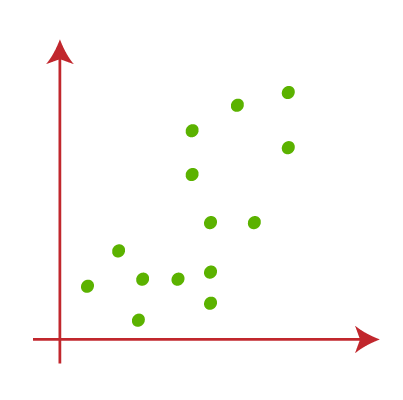

Let's take number k of clusters, i.e., K=2, to identify the dataset and to put them into different clusters. It means here we will try to group these datasets into two different clusters.


We need to choose some random k points or centroid to form the cluster. These points can be either the points from the dataset or any other point. So, here we are selecting the below two points as k points, which are not the part of our dataset. Consider the below image:

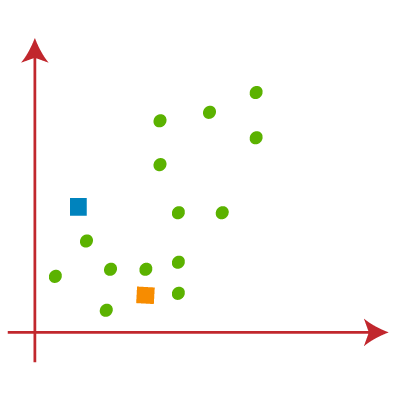

Now we will assign each data point of the scatter plot to its closest K-point or centroid. We will compute it by applying some mathematics that we have studied to calculate the distance between two points. So, we will draw a median between both the centroids. Consider the below image:

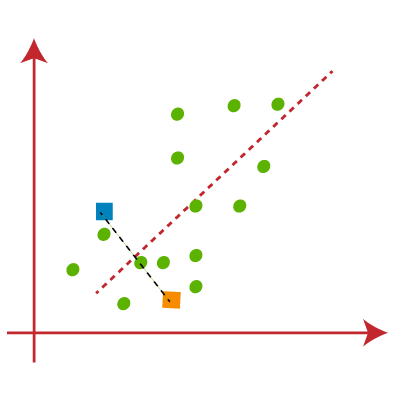

From the above image, it is clear that points left side of the line is near to the K1 or blue centroid, and points to the right of the line are close to the yellow centroid. Let's color them as blue and yellow for clear visualization.

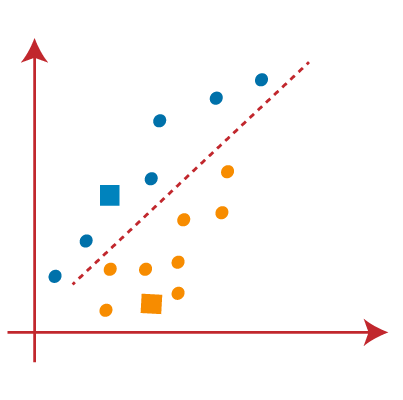

As we need to find the closest cluster, so we will repeat the process by choosing a new centroid. To choose the new centroids, we will compute the center of gravity of these centroids, and will find new centroids as below:

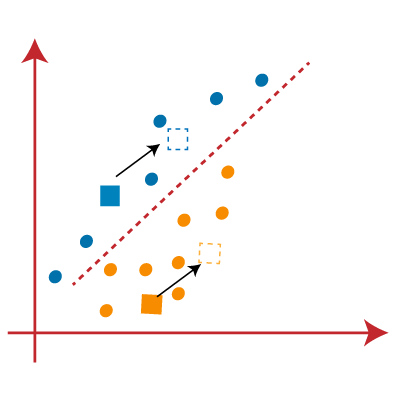

Next, we will reassign each datapoint to the new centroid. For this, we will repeat the same process of finding a median line. The median will be like below image:

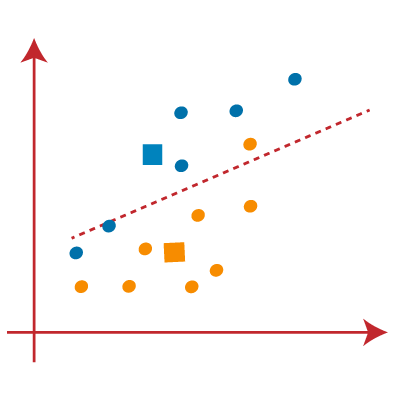

From the above image, we can see, one yellow point is on the left side of the line, and two blue points are right to the line. So, these three points will be assigned to new centroids.

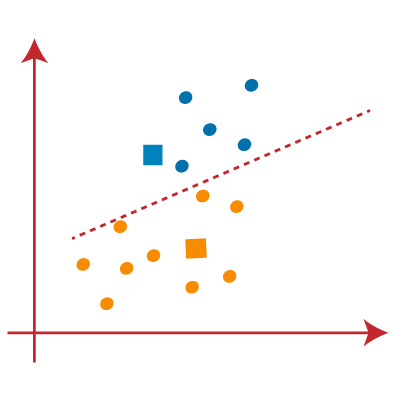

As reassignment has taken place, so we will again go to the step-4, which is finding new centroids or K-points.

We will repeat the process by finding the center of gravity of centroids, so the new centroids will be as shown in the below image:

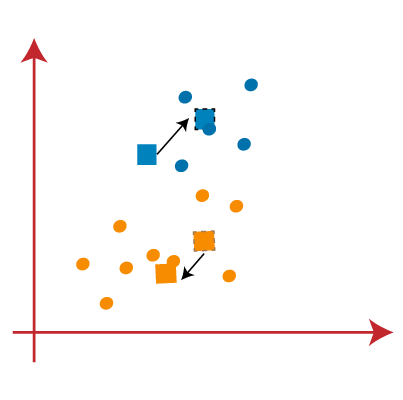

As we got the new centroids so again will draw the median line and reassign the data points. So, the image will be:


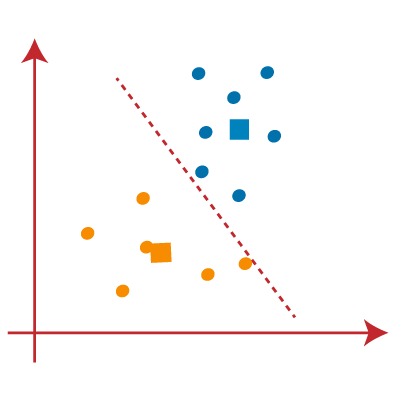

We can see in the above image; there are no dissimilar data points on either side of the line, which means our model is formed. Consider the below image:

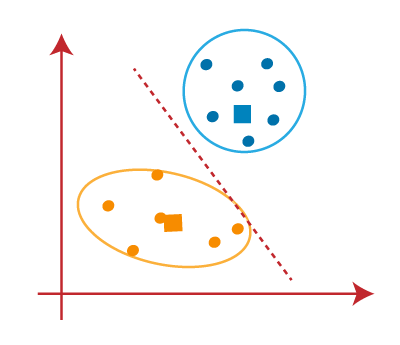

As our model is ready, so we can now remove the assumed centroids, and the two final clusters will be as shown in the below image:



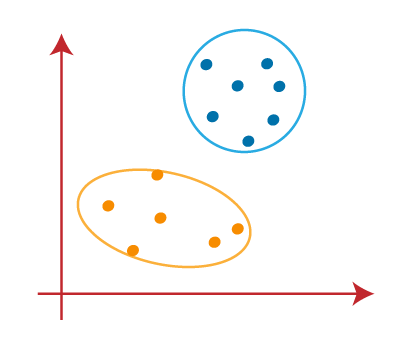

**How to choose the value of "K number of clusters" in K-means Clustering?**


The performance of the K-means clustering algorithm depends upon highly efficient clusters that it forms. But choosing the optimal number of clusters is a big task. There are some different ways to find the optimal number of clusters, but here we are discussing the most appropriate method to find the number of clusters or value of K. The method is given below:

**Elbow Method**


The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below

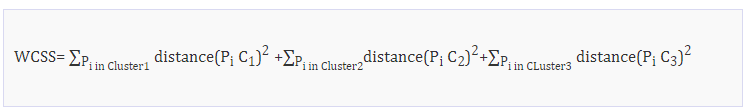

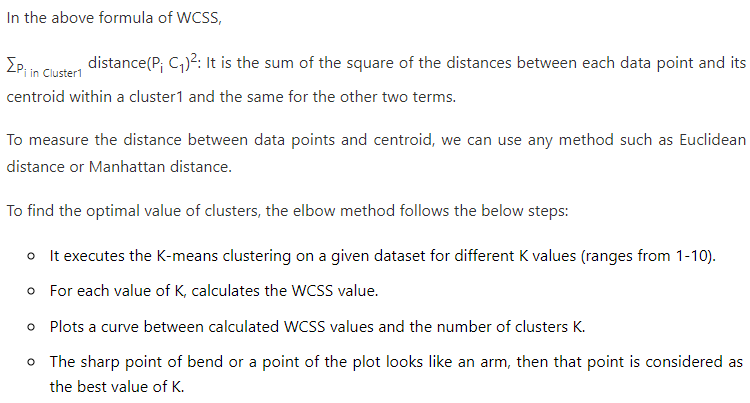

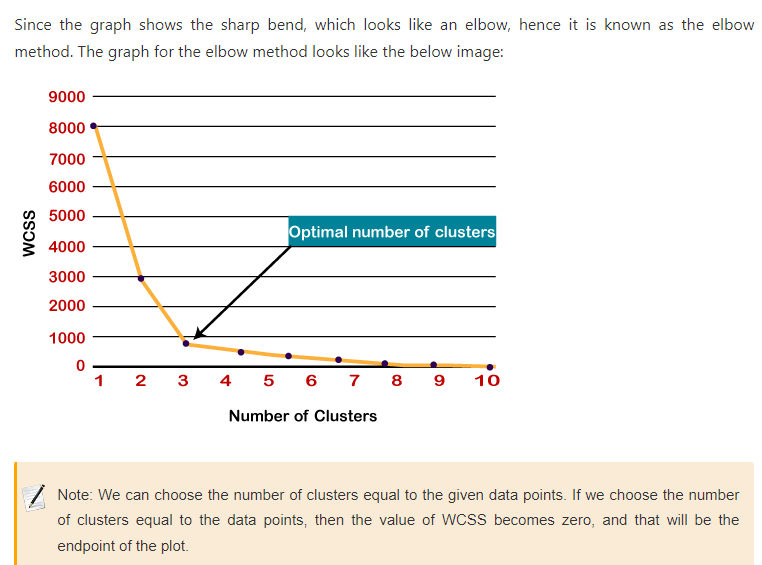

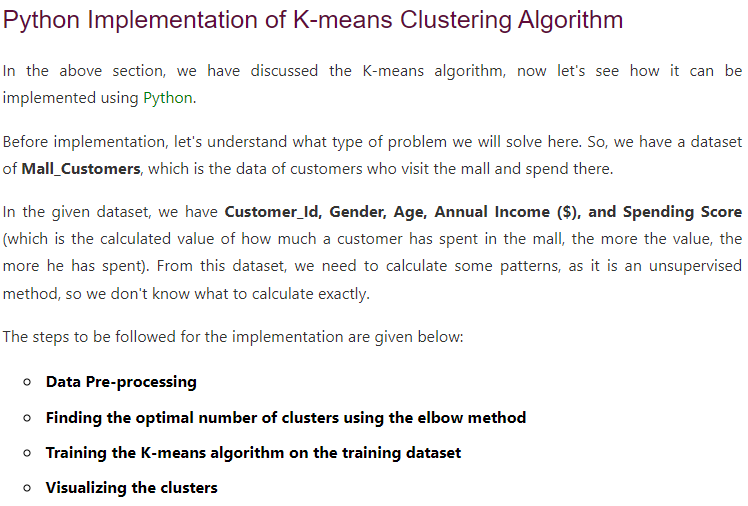

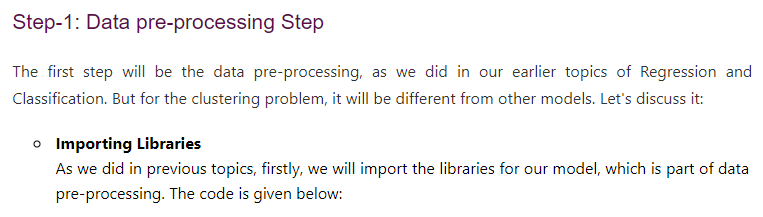

In [1]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
x = dataset.iloc[:, [3, 4]].values

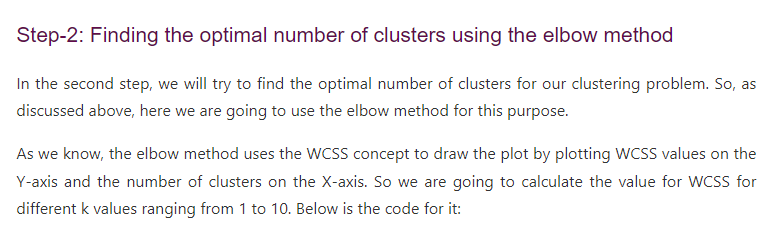

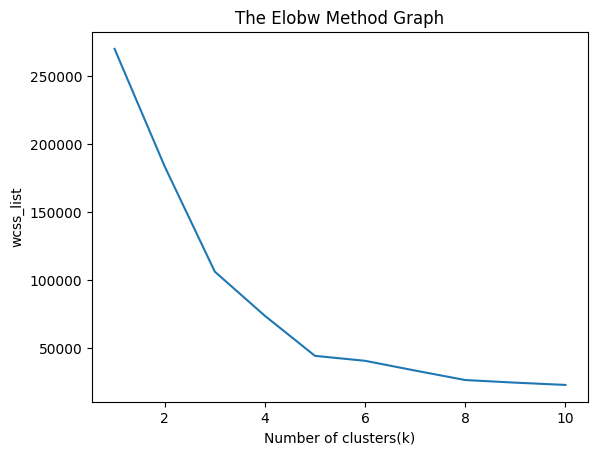

In [4]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elobw Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

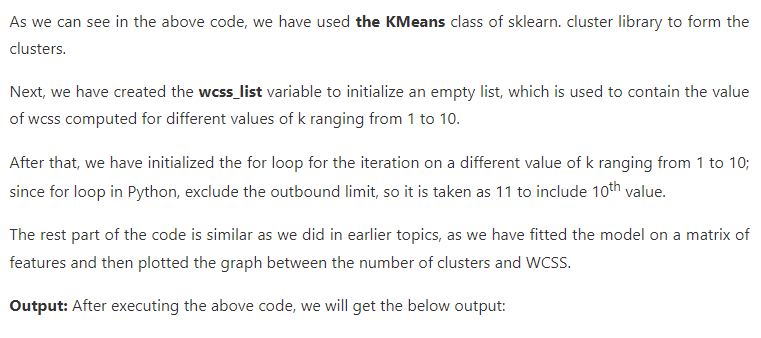

In [5]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

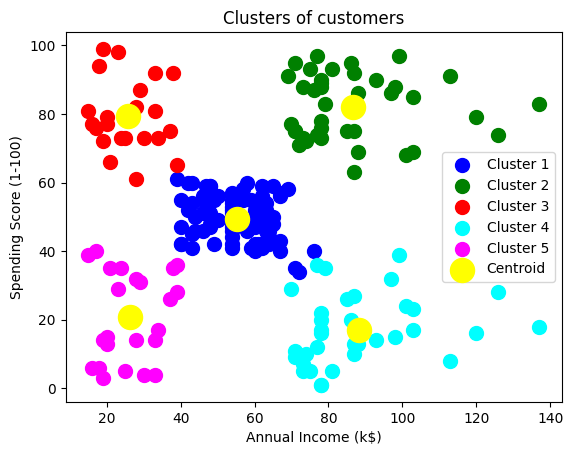

In [6]:
#visulaizing the clusters
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of customers')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()

# Hierarchical

In [7]:
# Importing the libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [8]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [9]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
x = dataset.iloc[:, [3, 4]].values

In [11]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

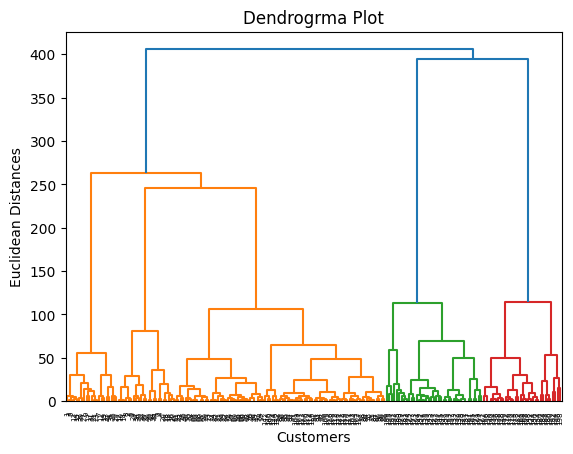

In [12]:
#Finding the optimal number of clusters using the dendrogram
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
mtp.title("Dendrogrma Plot")
mtp.ylabel("Euclidean Distances")
mtp.xlabel("Customers")
mtp.show()

In [14]:
#training the hierarchical model on dataset
from sklearn.cluster import AgglomerativeClustering
# 'affinity' parameter is not required when linkage is 'ward'
hc= AgglomerativeClustering(n_clusters=5, linkage='ward')
y_pred= hc.fit_predict(x)

In [15]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

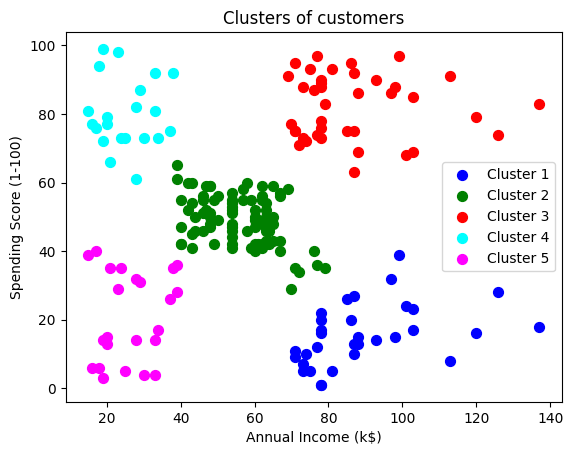

In [16]:
#visulaizing the clusters
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 50, c = 'blue', label = 'Cluster 1')
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
mtp.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
mtp.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
mtp.title('Clusters of customers')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()

# DBSCAN

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


In [ ]:
# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
					cluster_std=0.50, random_state=0)


['y', 'b', 'g', 'r']


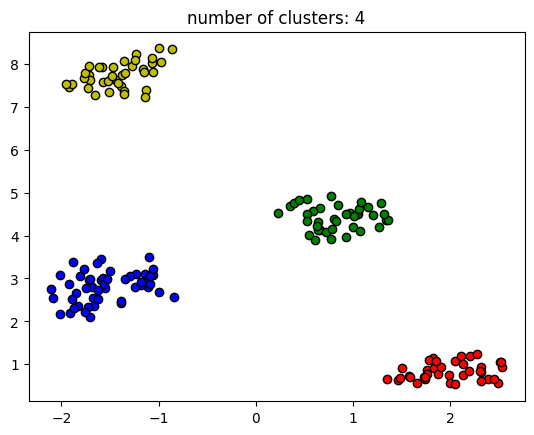

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


In [ ]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)



Silhouette Coefficient:0.13
